# 04 - THE BEST ESTIMATOR V1

## MODELAR ALGORITMO DE CLASIFICACIÓN BASE

Los modelos que vamos a poner a competir con mediante el GridSearch:

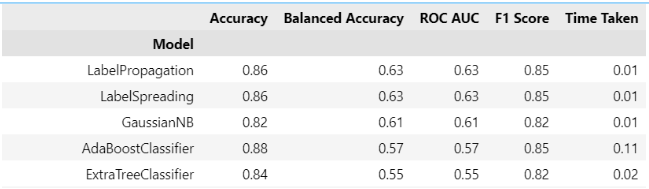

## IMPORTACIÓN DE PAQUETES

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Crear datasets de entrenamiento y validación
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
import scikitplot as skplt

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle



## IMPORTACIÓN DE DATOS

## CARGAR LOS DATOS

In [68]:
df_tablon = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df_tablon.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0


## SEPARAR PREDICTORAS Y TARGET

In [69]:
x = df_tablon.drop(columns= 'produccion').copy()
y = df_tablon.produccion.copy()

## MODELIZAR

### RESERVAR LOS DATASET DE ENTRENAMIENTO Y VALIDACIÓN

In [70]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state = 42)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES 

In [71]:
pipe = Pipeline([('algoritmo', ExtraTreesClassifier())])

grid =  [

            {
                'algoritmo': [GaussianNB()]
            },

            {
                'algoritmo': [LabelPropagation()]
            },

            {
                'algoritmo': [LabelSpreading()]
            },

            {
                'algoritmo': [ExtraTreesClassifier()]
            },

            {
                'algoritmo': [AdaBoostClassifier()]
            }

        ]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [72]:
grid_search = GridSearchCV( estimator= pipe,
                           param_grid= grid,
                           cv = 5,
                           scoring= 'roc_auc',
                           verbose=0,
                           n_jobs= -1
                        )

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.120055,0.008775,0.014468,0.003235,AdaBoostClassifier(),{'algoritmo': AdaBoostClassifier()},0.666667,1.000000,0.500000,1.0000,0.8125,0.795833,0.193828,1
2,0.005806,0.002979,0.004802,0.006401,LabelSpreading(),{'algoritmo': LabelSpreading()},0.888889,0.777778,0.777778,0.8750,0.6250,0.788889,0.094363,2
1,0.003972,0.004865,0.005890,0.003230,LabelPropagation(),{'algoritmo': LabelPropagation()},0.555556,0.444444,0.666667,0.8125,0.0000,0.495833,0.276232,3
3,0.222487,0.018532,0.016020,0.005070,ExtraTreesClassifier(),{'algoritmo': ExtraTreesClassifier()},0.111111,0.333333,0.666667,0.8750,0.2500,0.447222,0.281421,4
0,0.002347,0.001617,0.002588,0.003851,GaussianNB(),{'algoritmo': GaussianNB()},0.222222,0.444444,0.555556,0.5000,0.1250,0.369444,0.166574,5


In [73]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', AdaBoostClassifier())])

In [74]:
modelo.best_params_

{'algoritmo': AdaBoostClassifier()}

In [75]:
modelo.best_score_

0.7958333333333334

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [76]:
modelo_best_estimator = modelo

#### Guardar modelo, parámetros y score

In [77]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre el Train

In [78]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [79]:
t_roc_auc = roc_auc_score(train_y, pred)
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Roc AUC: {t_roc_auc}")
print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Roc AUC: 1.0
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00         6

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

### Predecir sobre la validación

In [80]:
pred = modelo.best_estimator_.predict(val_x)
pred_proba = modelo.best_estimator_.predict_proba(val_x)[:,1]

### Evaluar sobre la validación

In [81]:
v_roc_auc_proba = roc_auc_score(val_y, pred_proba)
v_roc_auc = roc_auc_score(val_y, pred)
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:{v_report}")

Roc AUC_proba: 0.6666666666666667
Roc AUC: 0.5
Accuracy: 0.6190476190476191
Classification Report:              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.14      0.33      0.20         3

    accuracy                           0.62        21
   macro avg       0.50      0.50      0.47        21
weighted avg       0.76      0.62      0.67        21



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

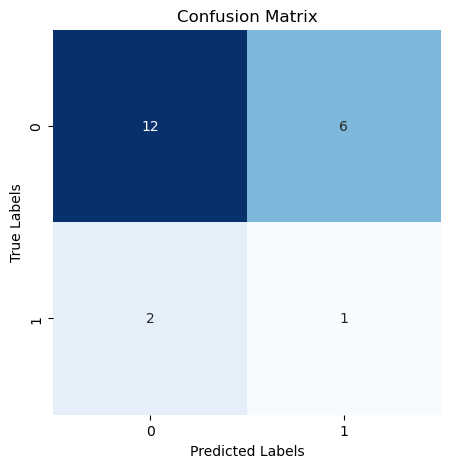

In [82]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Gain Chart

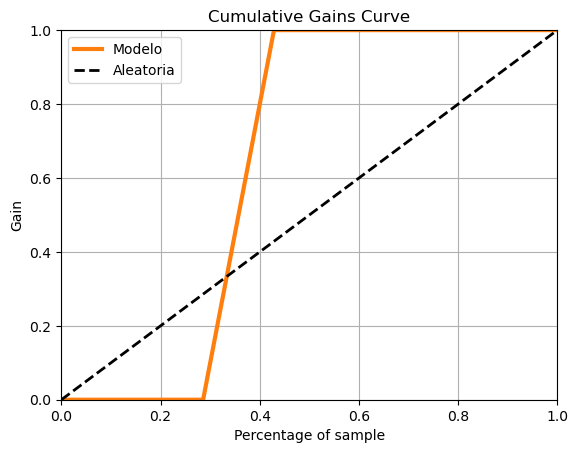

In [83]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()               
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

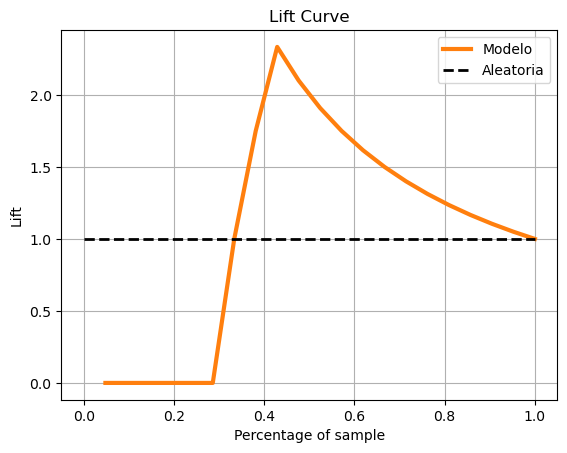

In [84]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()                
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

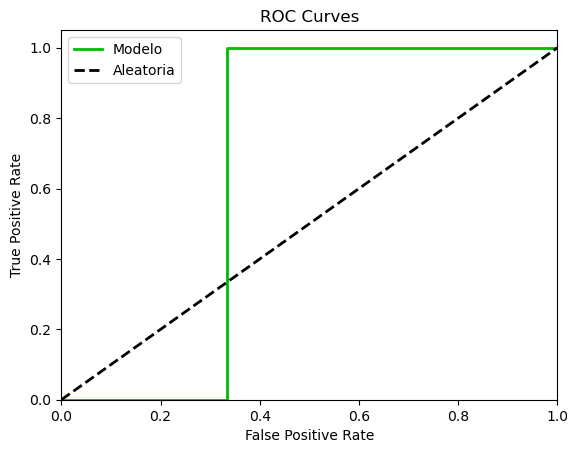

In [85]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()            
ax.lines[1].remove()
ax.lines[1].remove()
plt.legend(labels = ['Modelo','Aleatoria']);

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [86]:
version_estimator = '_v01'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'AdaBoostClassifier_v01.pickle'

In [87]:
m_best_estimator

'AdaBoostClassifier'

In [88]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [89]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Modelo Base"
x_columns = list(x.columns)
y_target = y.name


In [90]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_roc_auc_proba': v_roc_auc_proba,
               'v_roc_auc': v_roc_auc,
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                   AdaBoostClassifier
m_Best_paramans                   {'algoritmo': AdaBoostClassifier()}
m_Best_Score                                       0.7958333333333334
t_accuracy                                                        1.0
t_report                          precision    recall  f1-score   ...
v_roc_auc_proba                                              0.666667
v_roc_auc                                                         0.5
v_accuracy                                                   0.619048
v_report                          precision    recall  f1-score   ...
comentarios                                               Modelo Base
predictoras_X       [estacion, edad, e_infantil, acc_grave, int_qu...
target_y                                                   produccion
Name: AdaBoostClassifier_v01.pickle, dtype: object

In [91]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [92]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')

**CONCLUSIÓN**: El modelo tiene un AUC del 0.66 por lo que el modelo base no es lo suficientemente bueno para detectar todos los casos positivos. 

Vamos a probar el mismo algoritmo parametrizándolo para ver si mejoramos mejoramos.